In [39]:
import pandas as pd
l = pd.read_csv('lucknow.csv')
l

,date,AQI
0,2015-01-01,166.463581
1,2015-02-01,166.463581
2,2015-03-01,201.170053
3,2015-04-01,120.182119
4,2015-05-01,137.000000
...,...,...
62,2020-03-01,134.000000
63,2020-04-01,106.733333
64,2020-05-01,119.096774
65,2020-06-01,96.500000


In [40]:
l['date'] = pd.to_datetime(l['date'])
l.set_index('date', inplace=True)
l

,AQI
date,
2015-01-01,166.463581
2015-02-01,166.463581
2015-03-01,201.170053
2015-04-01,120.182119
2015-05-01,137.000000
...,...
2020-03-01,134.000000
2020-04-01,106.733333
2020-05-01,119.096774


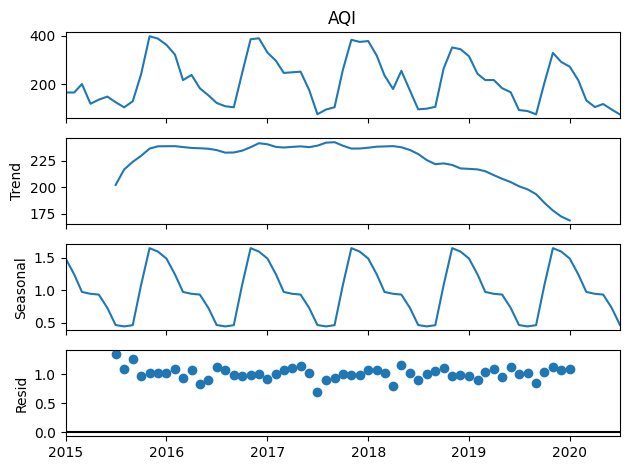

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
l_AQI = l['AQI']
result = seasonal_decompose(l_AQI, model='multiplicative')
result.plot();

In [20]:
!pip install pmdarima
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;

In [42]:
l_AQI = l['AQI']
auto_arima(y=l_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [43]:
train = l_AQI[:45] #from 2015-2018
test = l_AQI[46:65]# july 2018-june 2019

In [44]:
test

date
2018-11-01    351.600000
2018-12-01    344.677419
2019-01-01    315.516129
2019-02-01    243.071429
2019-03-01    217.645161
2019-04-01    217.700000
2019-05-01    184.096774
2019-06-01    167.700000
2019-07-01     94.419355
2019-08-01     90.322581
2019-09-01     76.633333
2019-10-01    205.387097
2019-11-01    329.366667
2019-12-01    292.193548
2020-01-01    272.645161
2020-02-01    216.655172
2020-03-01    134.000000
2020-04-01    106.733333
2020-05-01    119.096774
Name: AQI, dtype: float64

In [45]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                   45
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -239.491
Date:                              Mon, 29 Jan 2024   AIC                            486.981
Time:                                      07:59:35   BIC                            494.208
Sample:                                  01-01-2015   HQIC                           489.675
                                       - 09-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8873      0.063     14.064      0.000       0.764       1.011
ar.S.L12       0.8785      0.162      5.435      0.000       0.562       1.195
ma.S.L12      -0.2629      0.452     -0.582      0.560      -1.148       0.622
sigma2      1792.1372    411.793      4.352      0.000     985.037    2599.237
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.76   Prob(JB):                         0.67
Heteroskedasticity (H):               0.57   Skew:                             0.04
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
predictions = results.predict(start=45, end=67, typ='levels').rename('Predictions')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


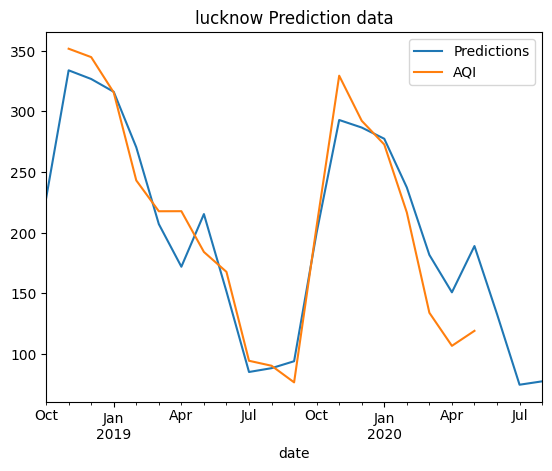

In [52]:
predictions.plot(legend=True)
test.plot(legend=True,title="lucknow Prediction data");

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error,mean_poisson_deviance,mean_gamma_deviance
import math
import numpy as np
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)
mse = mean_squared_error(test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: '+str(mape))
r2score=r2_score(test, predictions)
print('r2score: '+str(r2score))
explainedVariance_score=explained_variance_score(test, predictions)
print('explainedVariance_score: '+str(explainedVariance_score))
me=max_error(test, predictions)
print('me: '+str(me))
mpd=mean_poisson_deviance(test, predictions)
print('mpd: '+str(mpd))
mgd=mean_gamma_deviance(test, predictions)
print('mgd: '+str(mgd))

ValueError: Found input variables with inconsistent numbers of samples: [15, 19]

In [ ]:
# Forming the model:
final_model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
l_AQI.plot(legend=True,figsize=(12,8),grid=True,title="Delhi AQI");